In [126]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmeans_plot import plot_decision_boundaries
from sklearn.cluster import KMeans

In [127]:
data=pd.read_csv("dataset.csv",sep=";")
resultado=pd.Categorical(data["estado"])
data["Y"]=resultado.codes
features=["e"+str(i) for i in range(53)]
X=data[features]
Y=data[["Y"]]
g1=Y.index[Y["Y"]==0]
g2=Y.index[Y["Y"]==1]
Y=Y.to_numpy().ravel()

In [128]:
data.groupby("estado").mean().T

estado,A,R
e0,0.801435,0.204082
e1,0.638756,0.061224
e2,0.038278,0.020408
e3,0.811005,0.142857
e4,0.916268,0.448980
e5,0.000000,0.000000
e6,0.641148,0.122449
e7,0.188995,0.020408
e8,0.050239,0.000000
e9,0.095694,0.020408


In [129]:
overview=X.describe().T
no_nulas=overview[overview["mean"]>0].index
X=X[no_nulas]
no_nulas

Index(['e0', 'e1', 'e2', 'e3', 'e4', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11',
       'e12', 'e13', 'e17', 'e18', 'e21', 'e22', 'e23', 'e25', 'e26', 'e28',
       'e29', 'e31', 'e32', 'e33', 'e35', 'e37', 'e38', 'e42', 'e44', 'e48'],
      dtype='object')

In [130]:
overview

,count,mean,std,min,25%,50%,75%,max
e0,467.0,0.738758,0.439783,0.0,0.0,1.0,1.0,1.0
e1,467.0,0.578158,0.494383,0.0,0.0,1.0,1.0,1.0
e2,467.0,0.036403,0.187491,0.0,0.0,0.0,0.0,1.0
e3,467.0,0.740899,0.438611,0.0,0.0,1.0,1.0,1.0
e4,467.0,0.867238,0.339682,0.0,1.0,1.0,1.0,1.0
e5,467.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
e6,467.0,0.586724,0.492950,0.0,0.0,1.0,1.0,1.0
e7,467.0,0.171306,0.377180,0.0,0.0,0.0,0.0,1.0
e8,467.0,0.044968,0.207456,0.0,0.0,0.0,0.0,1.0
e9,467.0,0.087794,0.283299,0.0,0.0,0.0,0.0,1.0


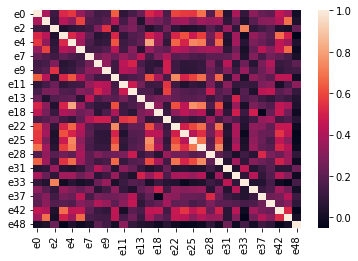

In [131]:
sns.heatmap(X.corr(method="spearman"));

In [132]:
pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_

array([0.36394685, 0.10641516])

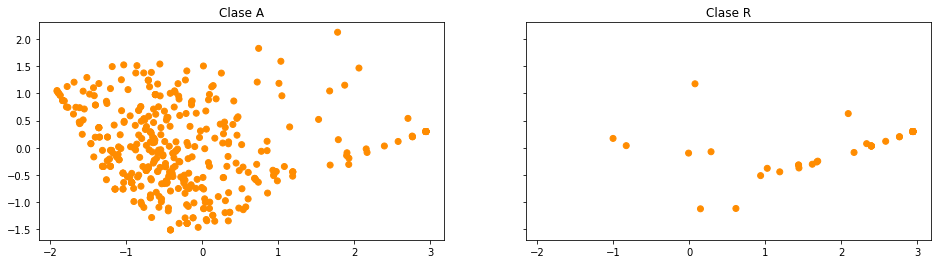

In [133]:
X_2=pca.fit_transform(X)
colors=["darkorange","gold"]
map=matplotlib.colors.ListedColormap(colors)
fig, ax = plt.subplots(1,2,sharex='all',sharey='all')
fig.set_size_inches(16,4)
ax[0].scatter(X_2[g1,0],X_2[g1,1],c=Y[g1],cmap=map)
ax[0].set_title("Clase A");
ax[1].scatter(X_2[g2,0],X_2[g2,1],c=Y[g2],cmap=map);
ax[1].set_title("Clase R");

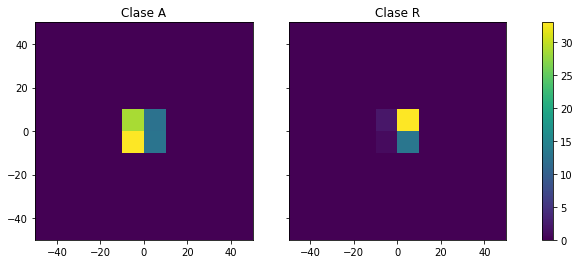

In [134]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(16, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),  
                 axes_pad=0.5,  
                 cbar_mode="single",
                 cbar_location="right",
                 cbar_pad=0.5,
                 share_all=True
                )
xbins=[-50,-40,-30,-20,-10,0,10,20,30,40,50]
ybins=[-50,-40,-30,-20,-10,0,10,20,30,40,50]
counts, xedges, yedges, image = grid[0].hist2d(X_2[g1,0],X_2[g1,1],bins=[xbins,ybins])
grid[0].set_title("Clase A");
counts, xedges, yedges, image = grid[1].hist2d(X_2[g2,0],X_2[g2,1],bins=[xbins,ybins])
grid[1].set_title("Clase R");
fig.colorbar(image, cax=grid.cbar_axes[0], orientation='vertical');

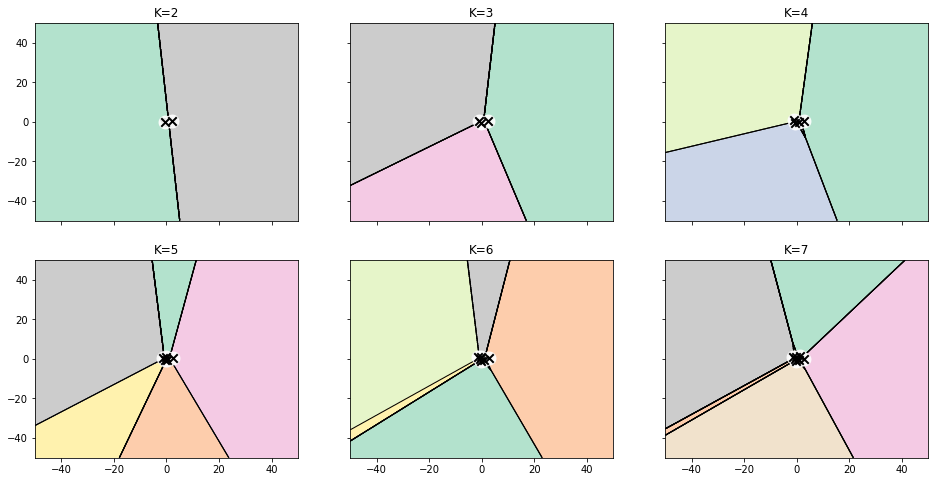

In [137]:
fig, ax = plt.subplots(2,3,sharex='all',sharey='all')
fig.set_size_inches(16,8)
inertias=[]
for pos,clusters in zip([[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]],[2,3,4,5,6,7]):
    kmeans=KMeans(n_clusters=clusters)
    grupos=kmeans.fit_predict(X_2)
    inertias.append(kmeans.inertia_)
    plot_decision_boundaries(kmeans, X_2, ax[pos[0],pos[1]],"K="+str(clusters))

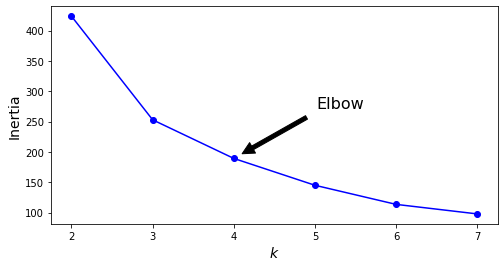

In [136]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 8), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()